In [46]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [47]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [48]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [49]:
# moist['Time'].head()


In [50]:
moist = moist.set_index('Time')
# moist.head()


In [52]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-01 15:46:18,29.5625,56.6111,22
2019-06-01 15:47:18,29.4375,56.2641,22
2019-06-01 15:48:19,29.6562,56.2909,22
2019-06-01 15:49:20,29.6875,56.2948,22
2019-06-01 15:50:21,29.9062,56.3216,22


In [44]:
# import matplotlib.pyplot as plt

# moist['Humidity'].plot()

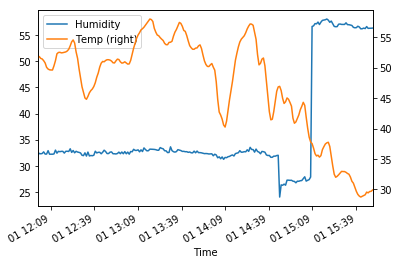

In [54]:
moist['2019-06-01 12:00':].Humidity.plot(legend=True)
moist['2019-06-01 12:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

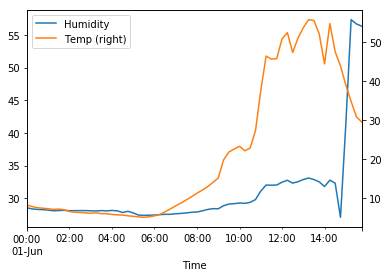

In [56]:
hourly = moist.resample('15Min').mean()
hourly['2019-06':].Humidity.plot(legend=True)
hourly['2019-06':].Temp.plot(secondary_y=True,legend=True)


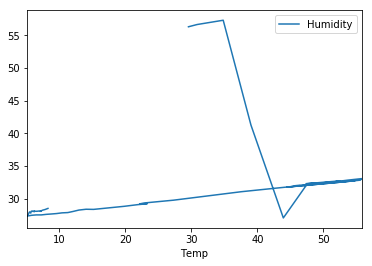

In [57]:
hourly['2019-06':].plot(x='Temp', y='Humidity')
# hourly.plot(x='Temp', y='Humidity')